In [1]:
#pip install lifelines

In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [3]:
# Loading the survival un-employment data
survival_umemp = pd.read_csv('survival_unemployment.csv')
survival_umemp

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
...,...,...,...,...,...
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30
3341,1,1,0,5.24175,29


### Data info:
+ spell: is the time period when the unemployed got new employment
+ event: of the employment
+ ui: the if the umployed had insurance or not

In [4]:
survival_umemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spell    3343 non-null   int64  
 1   event    3343 non-null   int64  
 2   ui       3343 non-null   int64  
 3   logwage  3343 non-null   float64
 4   age      3343 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 130.7 KB


In [5]:
survival_umemp.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [6]:
survival_umemp["spell"].describe()

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [7]:
# Spell is referring to time here
T = survival_umemp.spell

In [8]:
# Initaiting the KaplanMeierFitter model
kmf = KaplanMeierFitter()

<AxesSubplot: xlabel='timeline'>

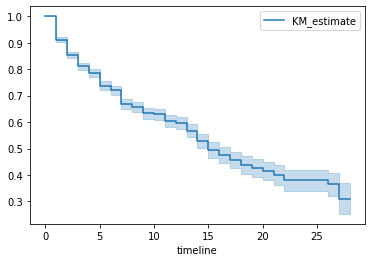

In [9]:
# Fitting the KaplnaMeirFitter model on Time and Events
kmf.fit(T,event_observed=survival_umemp.event)
# Time-line estimations plot
kmf.plot()

In [10]:
# Over Multiple groups 
# For each group, here group is ui
survival_umemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

#### more than 50% had insurance after unemployment

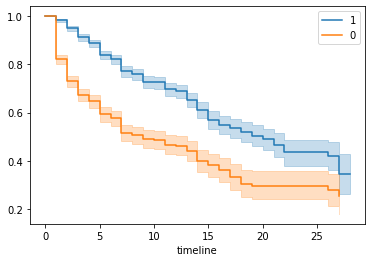

In [11]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_umemp.ui==1], survival_umemp.event[survival_umemp.ui==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_umemp.ui==0], survival_umemp.event[survival_umemp.ui==0], label='0')
ax = kmf.plot()